## Basic Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

/Users/taylorperkins/workspace/ds-cohort-2/test/data-question-1/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/taylorperkins/workspace/ds-cohort-2/test/data-question-1/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Read In the Data

In [2]:
gdp_df = pd.read_csv('./data/gdp_percapita.csv')
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2016,1802.695566,NaN
1,Afghanistan,2015,1809.016488,NaN
2,Afghanistan,2014,1838.960244,NaN
3,Afghanistan,2013,1848.700026,NaN
4,Afghanistan,2012,1839.273579,NaN
5,Afghanistan,2011,1660.739856,NaN


In [3]:
internet_df = pd.read_csv('./data/internet_use.csv')
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


## Explore Shape and Types

In [4]:
print('GDP shape: {} Rows and {} Columns'.format(*gdp_df.shape))
print('Internet: {} Rows and {} Columns'.format(*internet_df.shape))

GDP shape: 6206 Rows and 4 Columns
Internet: 4495 Rows and 4 Columns


In [5]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [6]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

## Show Last Few Rows of Datasets

In [7]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6196,Zimbabwe,1999,2699.857521,NaN
6197,Zimbabwe,1998,2761.318537,NaN
6198,Zimbabwe,1997,2725.888701,NaN
6199,Zimbabwe,1996,2698.917300,NaN
6200,Zimbabwe,1995,2488.298028,NaN
6201,Zimbabwe,1994,2529.826671,NaN
6202,Zimbabwe,1993,2360.793284,NaN
6203,Zimbabwe,1992,2384.972026,NaN
6204,Zimbabwe,1991,2681.495089,NaN
6205,Zimbabwe,1990,2605.794944,NaN


In [8]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


## Drop Footnotes (they are not helpful)

In [9]:
gdp_df.drop(columns=['Value Footnotes'], inplace=True)
internet_df.drop(columns=['Value Footnotes'], inplace=True)

print(f'GDP columns: {gdp_df.columns}')
print(f'Internet columns: {internet_df.columns}')

GDP columns: Index(['Country or Area', 'Year', 'Value'], dtype='object')
Internet columns: Index(['Country or Area', 'Year', 'Value'], dtype='object')


## Rename Columns to an Easier Format

In [10]:
gdp_df.rename(index=str, inplace=True, columns={
    "Country or Area": "Country", 
    "Value": "GDP_Per_Capita"
})
internet_df.rename(index=str, inplace=True, columns={
    "Country or Area": "Country", 
    "Value": "Internet_Users_Pct"
})

print(f'GDP columns: {gdp_df.columns}')
print(f'Internet columns: {internet_df.columns}')

GDP columns: Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')
Internet columns: Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')


## Merge Both DFs to One

In [11]:
gdp_and_internet_use = gdp_df.merge(
    internet_df, 
    on=['Country', 'Year'], 
    how='outer')

gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2016,1802.695566,NaN
1,Afghanistan,2015,1809.016488,NaN
2,Afghanistan,2014,1838.960244,6.390000
3,Afghanistan,2013,1848.700026,5.900000
4,Afghanistan,2012,1839.273579,5.454545


In [12]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7172,Virgin Islands (U.S.),1997,NaN,6.948369
7173,Virgin Islands (U.S.),1996,NaN,4.647186
7174,Virgin Islands (U.S.),1995,NaN,2.801958
7175,Virgin Islands (U.S.),1994,NaN,0.940645
7176,Virgin Islands (U.S.),1990,NaN,0.000000


## Subset DF to Only Include 2004, 2009, and 2014

In [13]:
gi_2004_2009_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year.isin([2004, 2009, 2014])]

gdp_and_internet_use_2004 = gi_2004_2009_2014.loc[gi_2004_2009_2014.Year == 2004]
gdp_and_internet_use_2009 = gi_2004_2009_2014.loc[gi_2004_2009_2014.Year == 2009]
gdp_and_internet_use_2014 = gi_2004_2009_2014.loc[gi_2004_2009_2014.Year == 2014]

print(f'''
gi_2004_2009_2014 years: {gi_2004_2009_2014.Year.unique()}\n
gdp_and_internet_use_2004 years: {gdp_and_internet_use_2004.Year.unique()}
gdp_and_internet_use_2009 years: {gdp_and_internet_use_2009.Year.unique()}
gdp_and_internet_use_2014 years: {gdp_and_internet_use_2014.Year.unique()}
''')


gi_2004_2009_2014 years: [2014 2009 2004]

gdp_and_internet_use_2004 years: [2004]
gdp_and_internet_use_2009 years: [2009]
gdp_and_internet_use_2014 years: [2014]



## Countries With Highest Internet Useage

### 2014

In [14]:
gdp_and_internet_use_2014.loc[
    gdp_and_internet_use_2014.Internet_Users_Pct == gdp_and_internet_use_2014.Internet_Users_Pct.max()
]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2332,Iceland,2014,41701.137092,98.16


### 2009

In [15]:
gdp_and_internet_use_2009.loc[
    gdp_and_internet_use_2009.Internet_Users_Pct == gdp_and_internet_use_2009.Internet_Users_Pct.max()
][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
2337,Iceland,93.0


### 2004

In [16]:
gdp_and_internet_use_2004.loc[
    gdp_and_internet_use_2004.Internet_Users_Pct == gdp_and_internet_use_2004.Internet_Users_Pct.max()
][['Country', 'Internet_Users_Pct']]

,Country,Internet_Users_Pct
5397,Sweden,83.89


## Countries With Highest and Lowest GDP Per Capita in 2014

### Highest

In [17]:
gdp_and_internet_use_2014.loc[
    gdp_and_internet_use_2014.GDP_Per_Capita == gdp_and_internet_use_2014.GDP_Per_Capita.max()
][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
3319,"Macao SAR, China",130755.115537


### Lowest

In [18]:
gdp_and_internet_use_2009.loc[
    gdp_and_internet_use_2009.GDP_Per_Capita == gdp_and_internet_use_2009.GDP_Per_Capita.min()
][['Country', 'GDP_Per_Capita']]

,Country,GDP_Per_Capita
1223,Dem. Rep. Congo,588.393411


## Internet Useage vs. GDP per Capita

### 2014

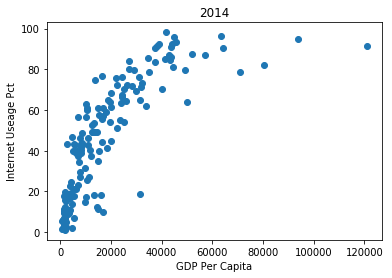

In [19]:
plt.scatter(
    gdp_and_internet_use_2014.GDP_Per_Capita,
    gdp_and_internet_use_2014.Internet_Users_Pct)

plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Useage Pct')
plt.title('2014');

### 2009

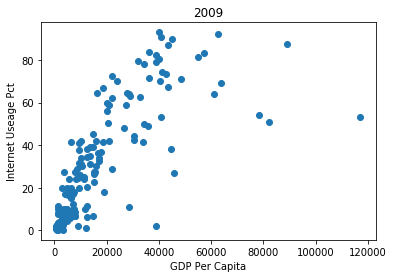

In [20]:
plt.scatter(
    gdp_and_internet_use_2009.GDP_Per_Capita,
    gdp_and_internet_use_2009.Internet_Users_Pct)

plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Useage Pct')
plt.title('2009');

### 2004

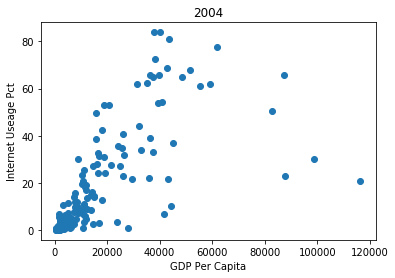

In [21]:
plt.scatter(
    gdp_and_internet_use_2004.GDP_Per_Capita,
    gdp_and_internet_use_2004.Internet_Users_Pct)

plt.xlabel('GDP Per Capita')
plt.ylabel('Internet Useage Pct')
plt.title('2004');

### Scatter Observations
People are definitely using the internet more!! 
And consistently.
However, it does not seem like internet useage is making a huge impact on GDP per Capita.
A correlation in GDP would result in the points shifting more to the right of each plot. 
Across the years, I do not see that change so much.

## GDP Per Capita Distributions, 2014

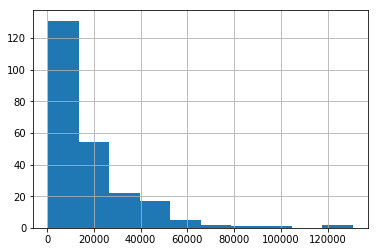

In [22]:
gdp_and_internet_use_2014.GDP_Per_Capita.hist();

### Is this unimodal??
Not completely.
There are some values around the 120000 range that can argue against this data being unimodal.

## Internet Useage Distribution, 2014

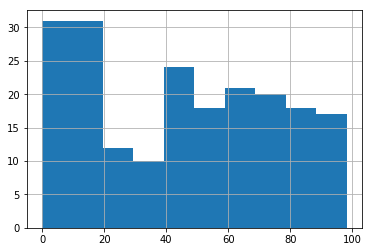

In [23]:
gdp_and_internet_use_2014.Internet_Users_Pct.hist();

### Is this unimodal?
Definitely not. 

## Top 5 Countries in Terms of Internet Use, 2014

In [24]:
top_5_internet_pct_2014 = gdp_and_internet_use_2014\
    .sort_values('Internet_Users_Pct', ascending=False)\
    .head(5)\
    [['Country', 'Internet_Users_Pct']]

top_5_internet_pct_2014

,Country,Internet_Users_Pct
2332,Iceland,98.16
6266,Bermuda,96.80
4143,Norway,96.30
1245,Denmark,95.99
6209,Andorra,95.90


### Internet Use Across All Years for Top 5 Countries in 2014

In [25]:
top_5_internet = gi_2004_2009_2014[
    gi_2004_2009_2014.Country.isin(top_5_internet_pct_2014.Country)]

assert len(top_5_internet) == 15

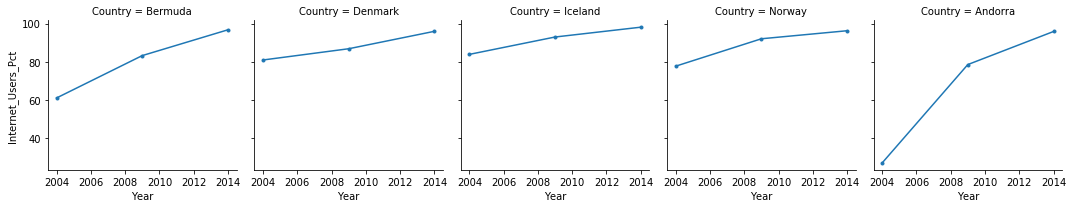

In [26]:
g = sns.FacetGrid(top_5_internet.sort_values('Year'), col="Country")
g = g.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")

### Greatest Growth
Definitely Andorra! 

## Bottom 5 Countries in Terms of Internet Use, 2014

In [27]:
bottom_5_internet_pct_2014 = gdp_and_internet_use_2014\
    .sort_values('Internet_Users_Pct', ascending=True)\
    .head(5)\
    [['Country', 'Internet_Users_Pct']]

bottom_5_internet_pct_2014

,Country,Internet_Users_Pct
6443,Dem. People's Rep. of Korea,0.00
6482,Eritrea,0.99
5576,Timor-Leste,1.14
712,Burundi,1.38
7014,Somalia,1.63


### Internet Use Across All Years for Top 5 Countries in 2014

In [28]:
bottom_5_internet = gi_2004_2009_2014[
    gi_2004_2009_2014.Country.isin(bottom_5_internet_pct_2014.Country)]

assert len(bottom_5_internet) == 15

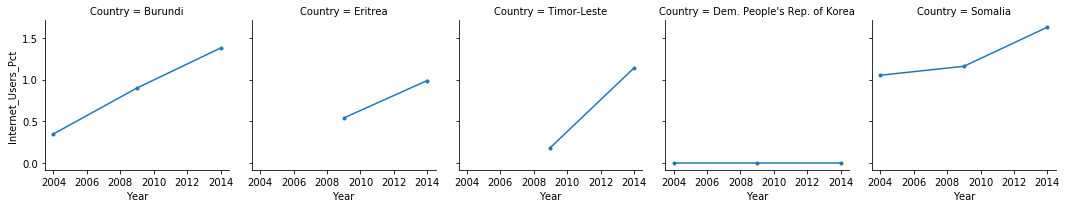

In [29]:
g = sns.FacetGrid(bottom_5_internet.sort_values('Year'), col="Country")
g = g.map(plt.plot, "Year", "Internet_Users_Pct", marker=".")

### Notes
Dem. People's Rep. of Korea refuses to use the internet!

## Top 5 Countries in Terms of GDP Per Capita, 2014

In [30]:
top_5_gdp_per_capita_2014 = gdp_and_internet_use_2014\
    .sort_values('GDP_Per_Capita', ascending=False)\
    .head(5)\
    [['Country', 'GDP_Per_Capita']]

top_5_gdp_per_capita_2014

,Country,GDP_Per_Capita
3319,"Macao SAR, China",130755.115537
4590,Qatar,120860.067558
3292,Luxembourg,93655.334163
4882,Singapore,80305.449884
631,Brunei,76089.286574


### GDP Per Capita Across All Years for Top 5 Countries in 2014

In [31]:
top_5_gdp_per_capita = gi_2004_2009_2014[
    gi_2004_2009_2014.Country.isin(top_5_gdp_per_capita_2014.Country)]

assert len(top_5_gdp_per_capita) == 15

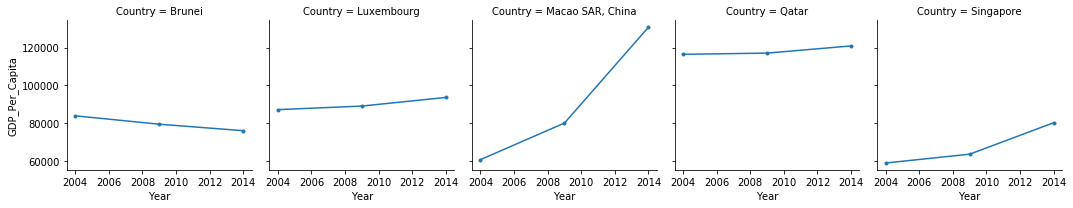

In [32]:
g = sns.FacetGrid(top_5_gdp_per_capita.sort_values('Year'), col="Country")
g = g.map(plt.plot, "Year", "GDP_Per_Capita", marker=".")

## Bottom 5 Countries in Terms of GDP Per Capita, 2014

In [33]:
bottom_5_gdp_per_capita_2014 = gdp_and_internet_use_2014\
    .sort_values('GDP_Per_Capita', ascending=True)\
    .head(5)\
    [['Country', 'GDP_Per_Capita']]

bottom_5_gdp_per_capita_2014

,Country,GDP_Per_Capita
899,Central African Republic,601.785892
1218,Dem. Rep. Congo,725.107860
712,Burundi,803.172837
3149,Liberia,804.719887
4062,Niger,904.163981


### GDP Per Capita Across All Years for Bottom 5 Countries in 2014

In [34]:
bottom_5_gdp_per_capita = gi_2004_2009_2014[
    gi_2004_2009_2014.Country.isin(bottom_5_gdp_per_capita_2014.Country)]

assert len(bottom_5_gdp_per_capita) == 15

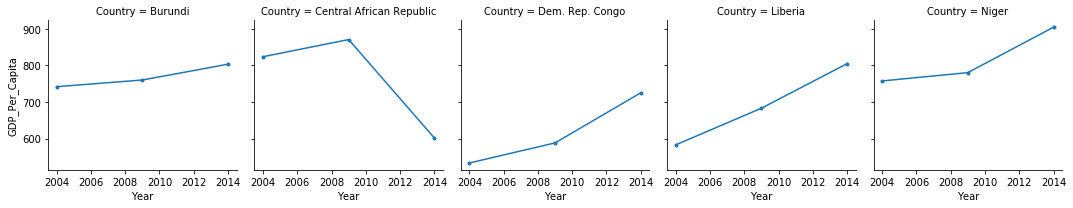

In [35]:
g = sns.FacetGrid(bottom_5_gdp_per_capita.sort_values('Year'), col="Country")
g = g.map(plt.plot, "Year", "GDP_Per_Capita", marker=".")